In [1]:
import laspy as lp
import numpy as np
from pyproj import Transformer
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
path = "../data/las/N-33-47-C-c-3-4.las"
las_file = lp.read(path)

dataset = np.vstack([las_file.x, las_file.y, las_file.z]).T

In [3]:
dataset

array([[ 3.741245e+05,  7.580845e+05, -2.790000e+00],
       [ 3.741250e+05,  7.580845e+05, -2.780000e+00],
       [ 3.741255e+05,  7.580845e+05, -2.770000e+00],
       ...,
       [ 3.750795e+05,  7.576050e+05,  1.090000e+00],
       [ 3.750800e+05,  7.576050e+05,  1.040000e+00],
       [ 3.750805e+05,  7.576050e+05,  1.060000e+00]], shape=(2687851, 3))

In [4]:
def transform_to_lonlat(dataset: np.array) -> np.array:
    """
    Convert coordinates from .las file to longitude and latitude.

    Args:
        dataset (np.array): Array of coordinates.

    Returns:
        np.array: Array of longitude and latitude coordinates.
    """


    source = "EPSG:2180" # PL-1992 is the projection used in the dataset
    dest = "EPSG:4326" # WGS84, the standard for GPS coordinates used all over the world

    # Create a transformer object
    transformer = Transformer.from_crs(source, dest, always_xy=True)

    x = dataset[:, 0]
    y = dataset[:, 1]
    z = dataset[:, 2]

    # Transform the coordinates
    lon, lat = transformer.transform(x, y)
    # Create a new array with the transformed coordinates
    transformed_coordinates = np.vstack((lon, lat, z)).T
    return transformed_coordinates

In [5]:
transformed_dataset = transform_to_lonlat(dataset)

In [6]:
transformed_dataset

array([[17.04746759, 54.67073887, -2.79      ],
       [17.04747534, 54.670739  , -2.78      ],
       [17.04748309, 54.67073912, -2.77      ],
       ...,
       [17.06247688, 54.66666855,  1.09      ],
       [17.06248463, 54.66666868,  1.04      ],
       [17.06249238, 54.6666688 ,  1.06      ]], shape=(2687851, 3))

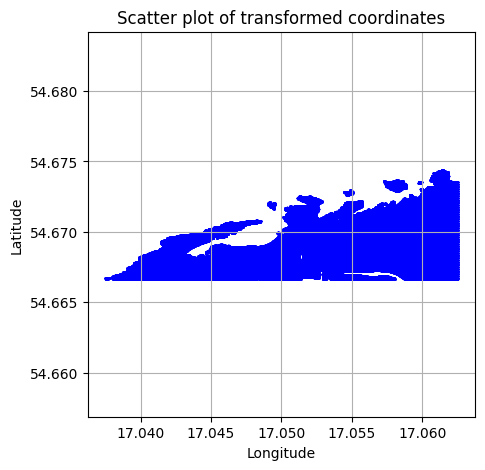

In [7]:
x_coord = transformed_dataset[:, 0]
y_coord = transformed_dataset[:, 1]

plt.figure(figsize=(5, 5))
plt.scatter(x_coord, y_coord, c="blue", s=0.1)
plt.title("Scatter plot of transformed coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.axis("equal")
plt.show()

In [8]:
coords = np.empty((0, 3))
for file in tqdm(os.listdir("../data/las")):
    if file.endswith(".las") and "N-34-37" in file:
        las_file = lp.read(os.path.join("../data/las", file))
        dataset = np.vstack([las_file.x, las_file.y, las_file.z]).T
        transformed_dataset = transform_to_lonlat(dataset)
        coords = np.vstack((coords, transformed_dataset)) if coords.size else transformed_dataset

100%|██████████| 294/294 [01:08<00:00,  4.32it/s]


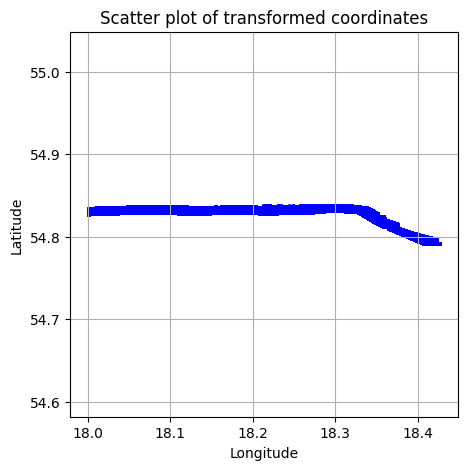

In [9]:
x_coord = coords[:100000000, 0]
y_coord = coords[:100000000, 1]

plt.figure(figsize=(5, 5))
plt.scatter(x_coord, y_coord, c="blue", s=0.1)
plt.title("Scatter plot of transformed coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.axis("equal")
plt.show()